## Problem Set 7

### Problem 0

Run the cell below to make sure you are in the data1030 coding environment. 

We will deduct 2 points for every missing OK sign. (If you don't run the cell, that's -14 points.)


In [12]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.0", 
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1", 'seaborn': "0.12.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.11.4

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.0 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


## Problem 1

One ML algorithm we didn't cover during class is the nearest neighbor algorithm. The principle behind nearest neighbors is to base your prediction for a given point on the true labels of a predefined number of training samples closest to that point in the feature space. The predicted label is some sort of average of the true labels of the nearest neighbors. The number of nearest neighbors is a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (distance-based neighbor learning). 

The challenge in this technique is the distance metric. How do you measure the distance between two points in the feature space? This is non-trivial question because usually different continuous features have different units and order of magnitudes, some features are one-hot-encoded, some features are ordinal. The key to successfully apply this method is usually to create a custom distance metric tailored to your dataset. However the standard Euclidean (geometric) distance is often used after the features are standard scaled.

Read more about this method [here](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification) and [here](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression).

### Problem 1a (10 points)

In this problem, we will implement nearest neighbor regression. Read the manual of KNeighborsRegressor. Let's study how the `n_neighbors` parameter impacts the prediction.

Please recreate the toy regression dataset from the lecture notes with n_samples = 30. Split the data into train and validation (70-30). Train models with n_neighbors = 1 to 10. Plot the train and validation scores using an evaluation metric of your choice as a function of n_neighbors.

Next, visualize the models by creating more plots that display the train/val points with different colors, the true function, and the model predictions for the various n_neighbors values. Use trained models with n_neighbors = [1,3,10,30]. Do NOT use helper_functions.ipynb! Prepare the plots yourself in the notebook. You will encounter an error message. Why? How do you fix it? Explain in a paragraph!

Answer the following questions and explain your answer. 
   - What `n_neighbors` value produces a high bias (low variance) model? What `n_neighbors` value produces a high variance (low bias) model? How do overfitting and underfitting shows up in the models?
   - How does the model behave with respect to outliers?
   - Explain why the model prediction is a step function and how this step function differs from a decision tree step function!

Based on the manual, what other parameter has a strong influence on the predictions? Prepare another figure to prove your point. 

n_neighbors: 1
The train score is: 1.0
The val score is:  0.978289753381958


n_neighbors: 2
The train score is: 0.9846479189720356
The val score is:  0.989091451686769


n_neighbors: 3
The train score is: 0.9624098625088394
The val score is:  0.9715994921321117


n_neighbors: 4
The train score is: 0.9420583306286014
The val score is:  0.9693223813918013


n_neighbors: 5
The train score is: 0.9199602007761771
The val score is:  0.9142366666364239


n_neighbors: 6
The train score is: 0.867678237638478
The val score is:  0.8360264528077398


n_neighbors: 7
The train score is: 0.8061245446502256
The val score is:  0.7285091399825936


n_neighbors: 8
The train score is: 0.7248087983105702
The val score is:  0.6218149907808397


n_neighbors: 9
The train score is: 0.6666004504889887
The val score is:  0.544038251964081


n_neighbors: 10
The train score is: 0.5965767298348694
The val score is:  0.4461974069024146




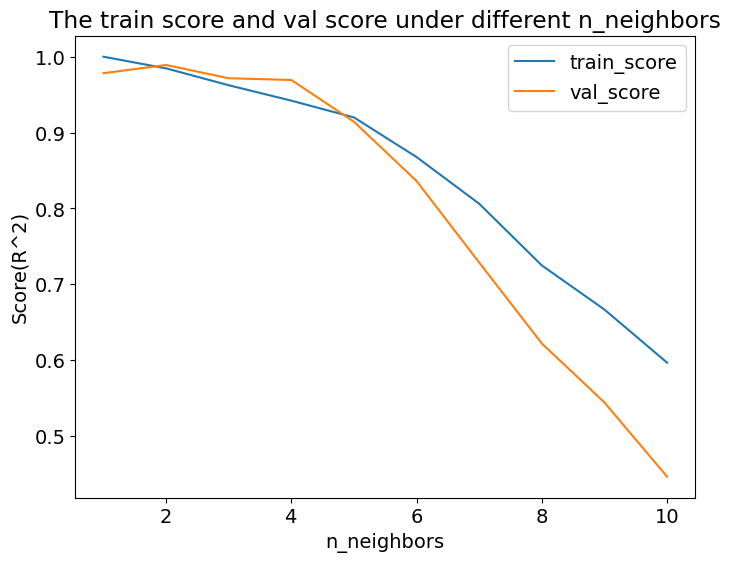

In [3]:
# your code here
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from matplotlib import pylab as plt

# 1.Create the data
np.random.seed(10)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30

X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1
X = X[:, np.newaxis]


# 2.Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=42)


# 3.Train KneighborsRegressor Model with different n_neighbors
n_neighbors = np.arange(1,11)
train_score = np.zeros(len(n_neighbors))
val_score = np.zeros(len(n_neighbors))

for i in n_neighbors:
    KNR = KNeighborsRegressor(n_neighbors=i)
    KNR.fit(X_train,y_train)
    train_score[i-1] = KNR.score(X_train,y_train)
    val_score[i-1] = KNR.score(X_val,y_val)
    print('n_neighbors:',i)
    print('The train score is:',train_score[i-1])
    print('The val score is: ',val_score[i-1])
    print('\n')


# 4. Plot out the figure
plt.figure(figsize=(8,6))
plt.plot(n_neighbors, train_score)
plt.plot(n_neighbors, val_score)
plt.xlabel('n_neighbors')
plt.ylabel('Score(R^2)')
plt.legend(['train_score','val_score'])
plt.title('The train score and val score under different n_neighbors')
plt.show()

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 21, n_neighbors = 30

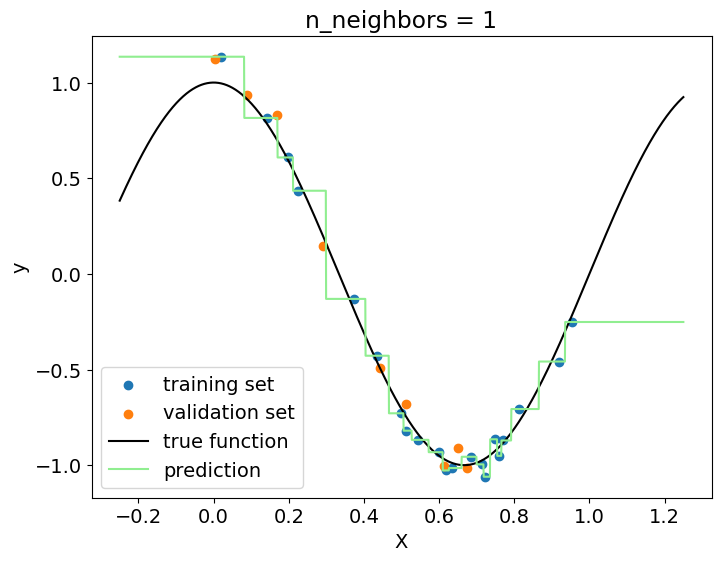

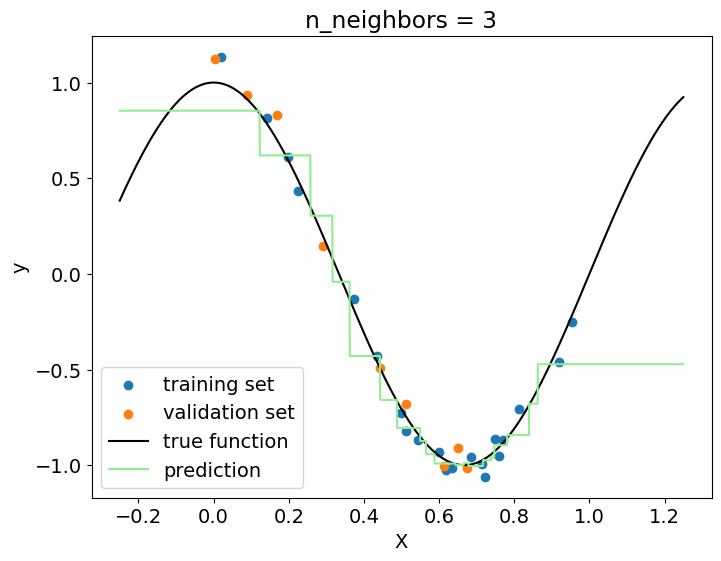

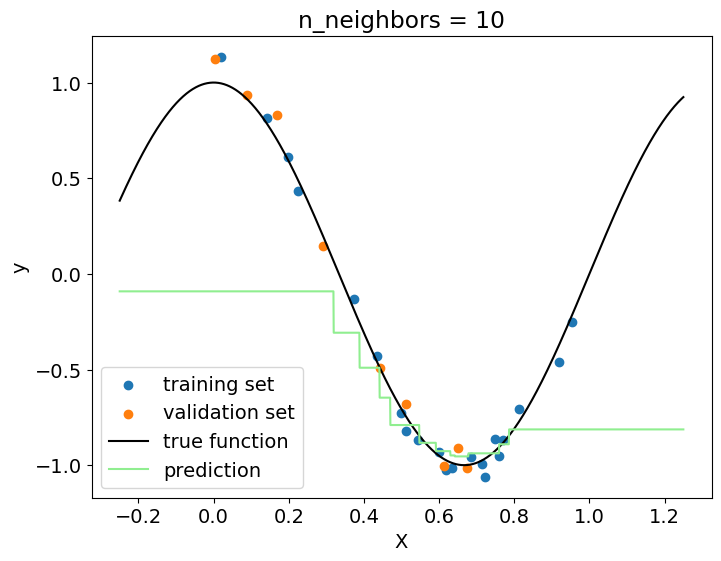

In [4]:
X_new = np.linspace(-0.25, 1.25, 2000)
y_new_true = true_fun(X_new)

n_neighbors = np.array([1,3,10,30])

for i in np.arange(len(n_neighbors)):

    KNR = KNeighborsRegressor(n_neighbors=n_neighbors[i])
    KNR.fit(X_train,y_train)
    y_new_pred = KNR.predict(X_new[:, np.newaxis])

    plt.figure(figsize=(8,6))
    plt.scatter(X_train,y_train,label='training set')
    plt.scatter(X_val,y_val,label='validation set')
    plt.plot(X_new,y_new_true,color='black',label='true function')
    plt.plot(X_new,y_new_pred,color='lightgreen',label='prediction')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend(loc='lower left')
    plt.title('n_neighbors = %d'%(n_neighbors[i]))
    

**your explanation here**

From the result above, we encountered the error: "ValueError: Expected n_neighbors <= n_samples,  but n_samples = 21, n_neighbors = 30". This is because when the number of neighbors equals to 30, it is larger than the datasets we already had in X_train(n_samples = 21). Therefore, in order to fix this problem, we need to add a condition check (an if-else sentence). Please see the code below:

The number of neighbors (n_neighbors=30) is larger than the total number of datasets in X_train, please modify the number of neighbors!


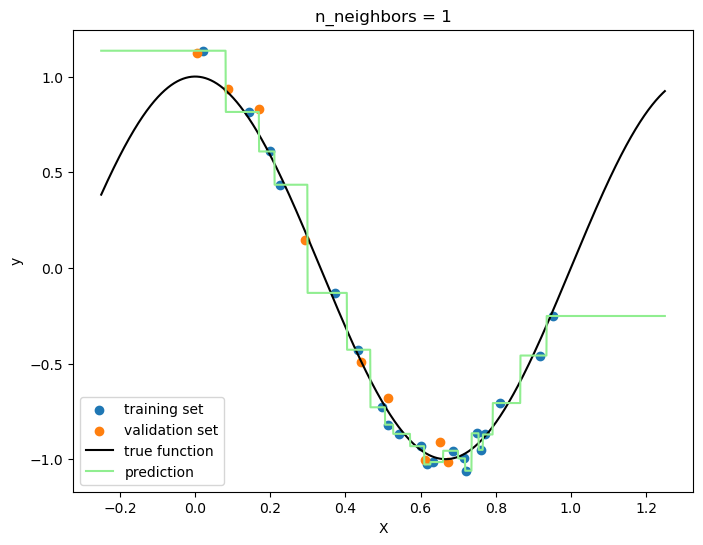

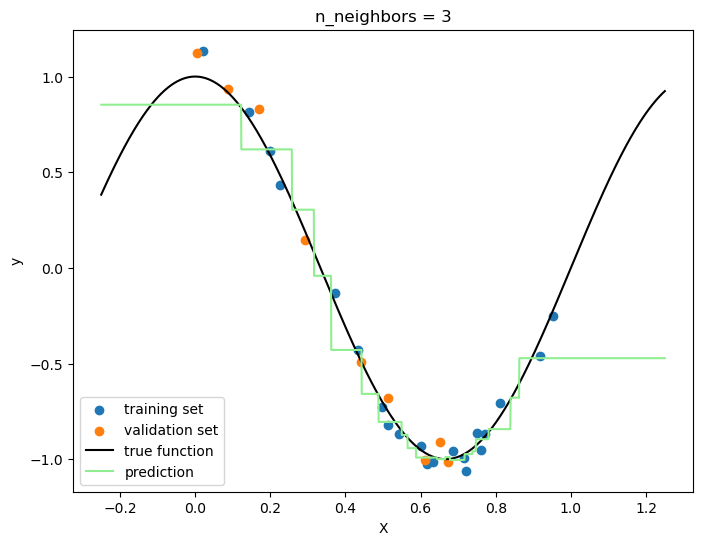

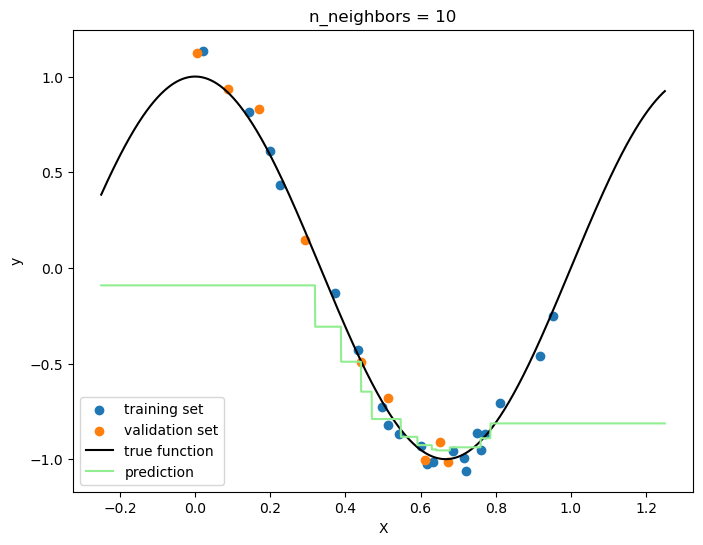

In [ ]:
X_new = np.linspace(-0.25, 1.25, 2000)
y_new_true = true_fun(X_new)

n_neighbors = np.array([1,3,10,30])

for i in np.arange(len(n_neighbors)):
    if n_neighbors[i]>len(X_train):
        print('The number of neighbors (n_neighbors=%d) is larger than the total number of datasets in X_train, please modify the number of neighbors!'%n_neighbors[i])
    else:
        KNR = KNeighborsRegressor(n_neighbors=n_neighbors[i])
        KNR.fit(X_train,y_train)
        y_new_pred = KNR.predict(X_new[:, np.newaxis])

        plt.figure(figsize=(8,6))
        plt.scatter(X_train,y_train,label='training set')
        plt.scatter(X_val,y_val,label='validation set')
        plt.plot(X_new,y_new_true,color='black',label='true function')
        plt.plot(X_new,y_new_pred,color='lightgreen',label='prediction')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.legend(loc='lower left')
        plt.title('n_neighbors = %d'%(n_neighbors[i]))
    

In [ ]:
n_neighbors = np.array([1,3,10,30])
val_var = np.zeros(len(n_neighbors))
val_absolute_bias = np.zeros(len(n_neighbors))

for i in np.arange(len(n_neighbors)):
    if n_neighbors[i]>len(X_train):
        print('The number of neighbors (n_neighbors=%d) is larger than the total number of datasets in X_train, please modify the number of neighbors!'%n_neighbors[i])
    else:
        KNR = KNeighborsRegressor(n_neighbors=n_neighbors[i])
        KNR.fit(X_train,y_train)
        y_val_pred = KNR.predict(X_val)
        val_var[i] = np.var(y_val_pred)
        val_absolute_bias[i] = np.mean(np.abs(y_val_pred - y_val))
        print('n_neighbors = %d :'%(n_neighbors[i]))
        print('Var:',val_var[i])
        print('Bias:',val_absolute_bias[i])

n_neighbors_absolute_bias_largest = n_neighbors[np.argmax(val_absolute_bias)]
n_neighbors_var_largest = n_neighbors[np.argmax(val_var)]
print('The n_neighbors of the model with the largest absolute bias is:',n_neighbors_absolute_bias_largest)
print('The n_neighbors of the model with the largest variance is:',n_neighbors_var_largest)

n_neighbors = 1 :
Var: 0.7266034974012958
Bias: 0.09141062275127361
n_neighbors = 3 :
Var: 0.6049688717366054
Bias: 0.11505696443662533
n_neighbors = 10 :
Var: 0.15180198806835013
Bias: 0.427129443100853
The number of neighbors (n_neighbors=30) is larger than the total number of datasets in X_train, please modify the number of neighbors!
The n_neighbors of the model with the largest absolute bias is: 10
The n_neighbors of the model with the largest variance is: 1


Answer the following questions and explain your answer. 
   - What `n_neighbors` value produces a high bias (low variance) model? What `n_neighbors` value produces a high variance (low bias) model? How do overfitting and underfitting shows up in the models?

   From the results above, we could find that the model with n_neighbors = 10 has the highest bias and lowest variance and the model with n_neighbors = 1 has the highest variance and the lowest bias. As n_neighbors become higher, the model would become more and more underfitting.

   - How does the model behave with respect to outliers?

   From the figure above, we could know that the model will predict the outliers as a constant number because when n_neighbors goes to negative infinity and positive infinity, the line of y_pred is a straight line with a specific constant number.


   - Explain why the model prediction is a step function and how this step function differs from a decision tree step function!

   The model prediction is a step function because in KNN, predictions for a new data point are made based on the majority class (for classification) or average (for regression) of the K-nearest data points in the feature space. KNN classifies a new data point by finding the K training data points that are closest to it in the feature space.For classification, the class that occurs most frequently among the K-nearest neighbors is assigned to the new data point. In addition, KNN is an instance-based learning algorithm while decision tree model is a tree-based model.
 


Based on the manual, the parameter 'weights' also has a strong influence on the predictions. In default, weights = 'uniform', let's change weights to 'distance'. Let's see the code below:

The number of neighbors (n_neighbors=30) is larger than the total number of datasets in X_train, please modify the number of neighbors!


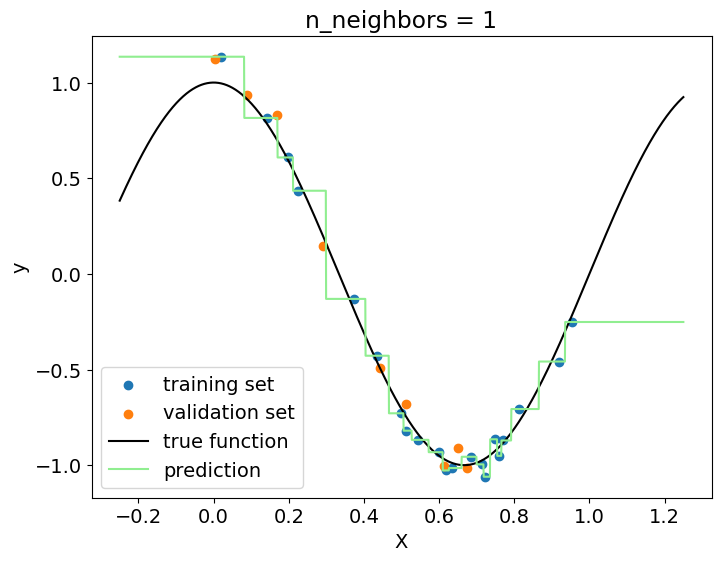

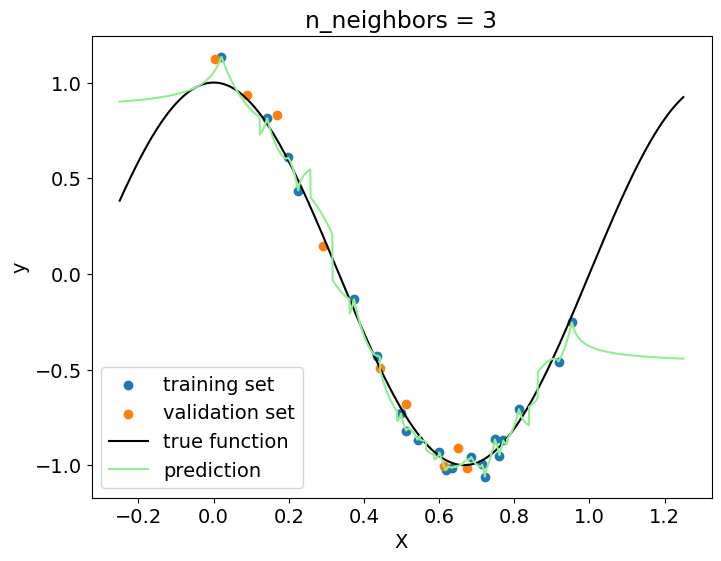

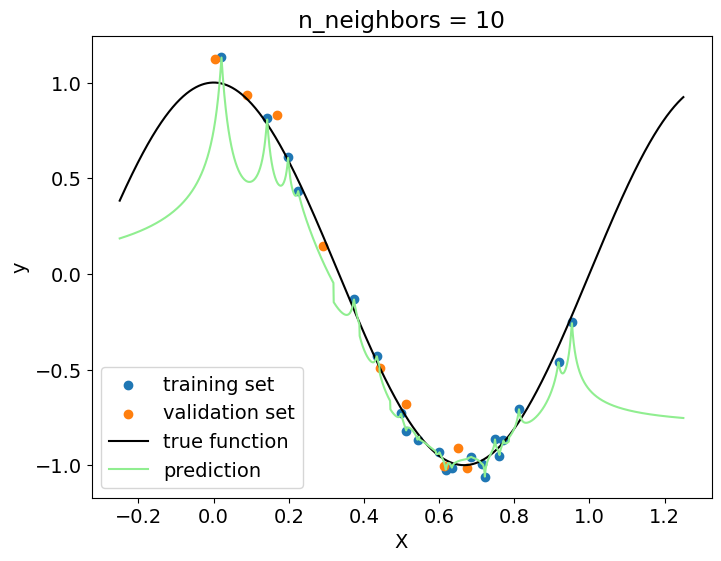

In [5]:
X_new = np.linspace(-0.25, 1.25, 2000)
y_new_true = true_fun(X_new)

n_neighbors = np.array([1,3,10,30])

for i in np.arange(len(n_neighbors)):
    if n_neighbors[i]>len(X_train):
        print('The number of neighbors (n_neighbors=%d) is larger than the total number of datasets in X_train, please modify the number of neighbors!'%n_neighbors[i])
    else:
        KNR = KNeighborsRegressor(n_neighbors=n_neighbors[i],weights='distance')
        KNR.fit(X_train,y_train)
        y_new_pred = KNR.predict(X_new[:, np.newaxis])

        plt.figure(figsize=(8,6))
        plt.scatter(X_train,y_train,label='training set')
        plt.scatter(X_val,y_val,label='validation set')
        plt.plot(X_new,y_new_true,color='black',label='true function')
        plt.plot(X_new,y_new_pred,color='lightgreen',label='prediction')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.legend(loc='lower left')
        plt.title('n_neighbors = %d'%(n_neighbors[i]))
    

### Problem 1b (5 points)

Next, we'll implement the nearest neighbors algorithm for a classification problem! Please import KNeighborsClassifier and read the manual. Let's study how the `n_neighbors` parameters impact the prediction.

Please recreate the toy classification dataset from the lecture notes (makemoons). 

Prepare a plot that shows predictions for n_neighbors = 1, 10, 30, and 100. Do NOT use helper_functions.ipynb! Prepare the plots yourself in the notebook using matplotlib or seaborn (plotly is not accepted).

Explain in a paragraph when KNeighborsClassifier underfits and overfits. You can either make an argument based on the figures you prepared or you can split the dataset to train/val (70-30), train models, calculate the train and validation scores using an evaluation metric of your choice, and plot the scores. 


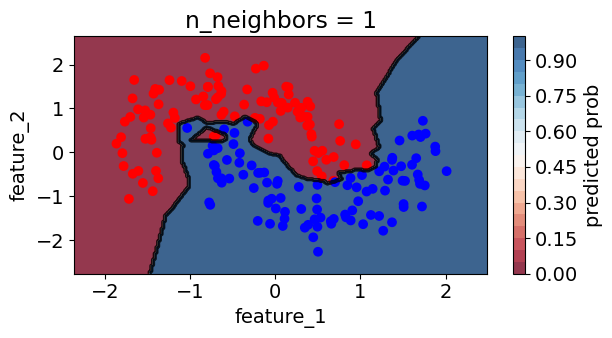

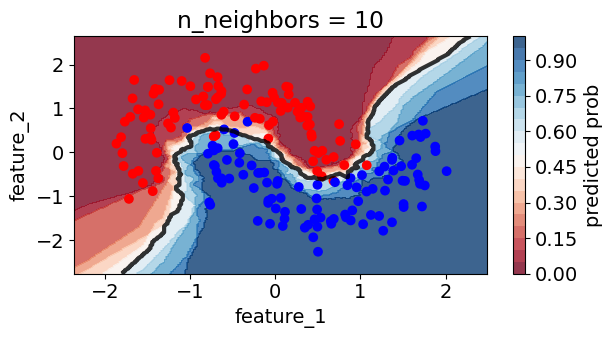

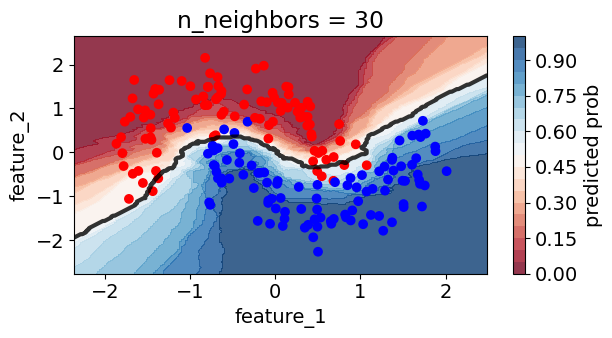

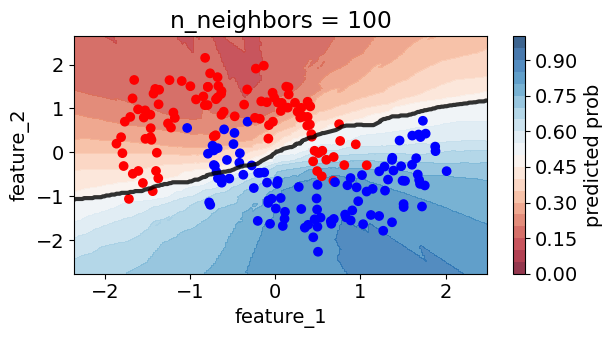

In [6]:
# your code here
import matplotlib 
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
matplotlib.rcParams.update({'font.size': 14})

# 1.Create the data
X,y = make_moons(noise=0.2, random_state=1,n_samples=200)

scaler = StandardScaler()
X = scaler.fit_transform(X)

h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cm = plt.cm.RdBu


# 2.Train KNeighborsClassifier Model with different n_neighbors
n_neighbors = np.array([1,10,30,100])


for i in np.arange(len(n_neighbors)):
    if n_neighbors[i]>(X.shape[0]):
        print('The number of neighbors (n_neighbors=%d) is larger than the total number of datasets in X, please modify the number of neighbors!'%n_neighbors[i])
    else:
        KNC = KNeighborsClassifier(n_neighbors=n_neighbors[i])
        KNC.fit(X,y)
        y_pred = KNC.predict(X)
        Z = KNC.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure(figsize=(6.4,3.6))
        plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
        plt.colorbar(label='predicted prob')
        plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
        plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
        plt.xlabel('feature_1')
        plt.ylabel('feature_2')
        plt.title('n_neighbors = %d'%(n_neighbors[i]))
        plt.tight_layout()
        plt.show()

n_neighbors=1:
The train score is: 1.0
The val score is:  0.9666666666666667


n_neighbors=10:
The train score is: 0.9714285714285714
The val score is:  0.9666666666666667


n_neighbors=30:
The train score is: 0.95
The val score is:  0.9666666666666667


n_neighbors=100:
The train score is: 0.7357142857142858
The val score is:  0.8




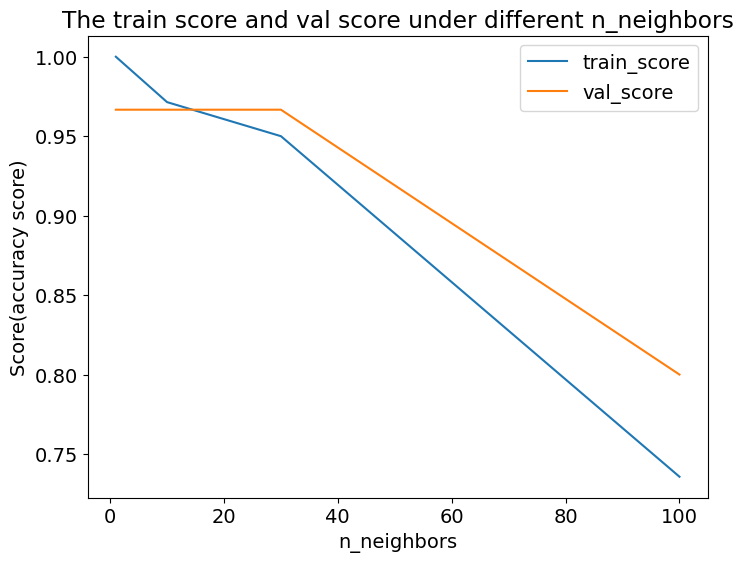

In [7]:
# your code here
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier

# 1.Create the data
X,y = make_moons(noise=0.2, random_state=1,n_samples=200)


# 2.Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=1)


# 3.Train KNeighborsClassifier Model with different n_neighbors
n_neighbors = np.array([1,10,30,100])
train_score = np.zeros(len(n_neighbors))
val_score = np.zeros(len(n_neighbors))
train_acc_score = np.zeros(len(n_neighbors))
val_acc_score = np.zeros(len(n_neighbors))



for i in np.arange(len(n_neighbors)):
    if n_neighbors[i]>(X_train.shape[0]):
        print('The number of neighbors (n_neighbors=%d) is larger than the total number of datasets in X_train, please modify the number of neighbors!'%n_neighbors[i])
    else:
        KNC = KNeighborsClassifier(n_neighbors=n_neighbors[i])
        KNC.fit(X_train,y_train)
        train_score[i] = KNC.score(X_train,y_train)
        val_score[i] = KNC.score(X_val,y_val)

        print('n_neighbors=%d:'%(n_neighbors[i]))
        print('The train score is:',train_score[i])
        print('The val score is: ',val_score[i])
        print('\n')

# 4. Plot out the figure
plt.figure(figsize=(8,6))
plt.plot(n_neighbors, train_score)
plt.plot(n_neighbors, val_score)
plt.xlabel('n_neighbors')
plt.ylabel('Score(accuracy score)')
plt.legend(['train_score','val_score'])
plt.title('The train score and val score under different n_neighbors')
plt.show()

**your explanation here**

From the figure above, we could find that when n_neighbors is too small, the model might be over fitting since the accuracy score of the model is very high(near to 1). However, when n_neighbors is too large, the model might be under fitting since the accuracy score of the model is low. When n_neighbors becomes larger, the accuracy score of validation might be goes up firstly, but it will soon go down.

## Problem 2

Let's play around with more algorithms! In this problem, you will work with the diabetes dataset and try different ML algorithms to figure out which one is the best. Whenever you work with a new dataset, you want to try as many algorithms on it as possible because you can't know in advance which algorithm (and hyperparameters) will be the best.

Generally you need to decide five things when you build an ML pipeline:
- your splitting strategy
- how to preprocess the data
- what evaluation metric you'll use
- what ML algorithms you will try
- what paramater grid you should use for each ML algorithm

You'll write a function in problem 2a that takes a preprocessor, an ML algorithm, and its corresponding parameter grid as inputs and it will calculate test scores and return the best models. The splitting strategy and the evaluation metric are not inputs to this function but predefined.

### Problem 2a (15 points)

Write a function which takes the unprocessed feature matrix, target variable, a preprocessor (ColumnTransformer), an initialized ML algorithm, and a correspondig parameter grid as inputs. Do the following inside the function:
 1. split the data to other and test (80-20) and then use KFold with 4 folds
 2. preprocess the data and perform cross validation (I recommend you use GridSearchCV)
 3. Finally, calculate the test score. Use RMSE as your evaluation metric. 
 
 Repeat this 10 times for 10 different random states, and the function should return the 10 best models and the 10 test scores. The skeleton of the function is provided for convenince.

The function name contains the splitting strategy and the evaluation metric (i.e., `MLpipe_KFold_RMSE`). It would be difficult (but not impossible) to write a general `MLpipe` function that takes a splitter and an evaluation metric also as inputs for two reasons:
- some splitters are difficult to pass as a function argument (e.g., two train_test_split steps, or a train_test_split combined with a KFold),
- some evaluation metrics need to be maximized (like accuracy, R2, f_beta), while others need to be minimized (like logloss, RMSE) and the code for these two options differ.

For now, I recommend that if you need to try multiple ML algorithms, write a function that's specific to a splitting strategy and an evaluation metric and add a description to the function as shown in MLpipe_KFold_RMSE. Such functions make it very easy to try many ML algorithms on your dataset and I recommend you write a similar function for your project.

Add plenty of test and print statements to make sure your code works correctly and it does what you expect it to do. You are encouraged to: print the sets and their shapes before and after preprocessing, print the GridSearchCV results, print the test scores.

Test the function with linear regression models that use l1 regularization. Fix any warnings you might encounter. Print out the mean and the standard deviation of the test scores.

In [8]:
# read in the dataset as a dataframe
df = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep='\t')

# create target series and feature matrix 
y = df['Y']
X = df.loc[:, df.columns != 'Y']


# function for the ML pipeline as outlined above 
def MLpipe_KFold_RMSE(X, y, preprocessor, ML_algo, param_grid):
    '''
    This function splits the data to other/test (80/20) and then applies KFold with 4 folds to other.
    The RMSE is minimized in cross-validation.

    You should:

    1. Loop through 10 different random states
    2. Split your data 
    3. Fit a model using GridSearchCV with KFold and the predefined Preprocessor 
    4. Calculate the model's error on the test set 
    5. Return a list of 10 test scores and 10 best models 
    '''
    
    nr_states = 10
    # lists to be returned 
    test_scores = np.zeros(nr_states)
    final_models = []
    best_models = []

    # your code here...

    for i in range(nr_states):
        # first split to separate out the test set
        # we will use kfold on other
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)

        # splitter for other
        kf = KFold(n_splits=4,shuffle=True,random_state=42*i)

        # the machine learning algorithm
        ML = ML_algo()
        if ML_algo in [SVR,KNeighborsRegressor]:
            ML = ML_algo()
        else:
            ML = ML_algo(random_state = 42*i) # initialize the machine learning model

        # let's put together a pipeline
        # the pipeline will fit_transform the training set (3 folds), and transform the last fold used as validation
        # then it will train the ML algorithm on the training set and evaluate it on the validation set
        # it repeats this step automatically such that each fold will be an evaluation set once
        pipe = make_pipeline(preprocessor,ML)

        # use GridSearchCV
        # GridSearchCV loops through all parameter combinations and collects the results 
        grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'neg_root_mean_squared_error',
                            cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
        
        # this line actually fits the model on other
        grid.fit(X_other, y_other)
        # save results into a data frame. feel free to print it and inspect it
        results = pd.DataFrame(grid.cv_results_)
        #print(results)

        print('best model parameters:',grid.best_params_)
        print('validation score:',grid.best_score_) # this is the mean validation score over all iterations
        # save the model
        # final_models.append(grid)
        final_models.append(grid)
        # calculate and save the test score
        best_models = final_models[-1]
        y_test_pred = best_models.predict(X_test)
        test_scores[i] = np.sqrt(mean_squared_error(y_test,y_test_pred))
        print('test score:',test_scores[i])

    # np.random.seed(10)
    return test_scores, best_models

In [9]:
# test your function with a linear regression model (l1 regularization)
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# read in the dataset as a dataframe
df = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep='\t')

# create target series and feature matrix 
y = df['Y']
X = df.loc[:, df.columns != 'Y']

ordinal_ftrs = [] 
ordinal_cats = []
onehot_ftrs = ['SEX']
minmax_ftrs = ['AGE','BMI']
std_ftrs = ['BP','S1','S2','S3','S4','S5','S6']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

param_grid = {
              'lasso__alpha': np.logspace(-7,0,29),
              'lasso__max_iter':[100000000]
              }

test_scores, best_models = MLpipe_KFold_RMSE(X, y, preprocessor, Lasso, param_grid)
mean_test_scores = np.mean(test_scores)
std_test_scores = np.std(test_scores)
print('The mean of test score (linear regression-l1 regularization) is:',mean_test_scores)
print('The standard deviation of test score (linear regression-l1 regularization) is:',std_test_scores)

Fitting 4 folds for each of 29 candidates, totalling 116 fits
best model parameters: {'lasso__alpha': 0.31622776601683794, 'lasso__max_iter': 100000000}
validation score: -55.10845760210425
test score: 58.3779973496396
Fitting 4 folds for each of 29 candidates, totalling 116 fits
best model parameters: {'lasso__alpha': 0.1778279410038923, 'lasso__max_iter': 100000000}
validation score: -55.46675231274581
test score: 53.450346240014255
Fitting 4 folds for each of 29 candidates, totalling 116 fits
best model parameters: {'lasso__alpha': 0.1, 'lasso__max_iter': 100000000}
validation score: -54.43755106398863
test score: 55.904742594654756
Fitting 4 folds for each of 29 candidates, totalling 116 fits
best model parameters: {'lasso__alpha': 0.31622776601683794, 'lasso__max_iter': 100000000}
validation score: -55.76310979245104
test score: 52.40026859543386
Fitting 4 folds for each of 29 candidates, totalling 116 fits
best model parameters: {'lasso__alpha': 0.5623413251903491, 'lasso__max_it

### Problem 2b (15 points)

Next, train the following models on the diabetes dataset:
- linear regression with l1 regularization (already completed in 2a)
- linear regression with l2 regularization 
- linear regression with an elastic net 
- RF
- SVR
- k nearest neighbor regression

Please determine what the parameter grid should be for each of these methods. Follow the guidance we discussed during the lecture.

Make sure your code is reproducable! When you rerun it, you should get back the exact same test scores and best hyperparameters in each run. So fix your random states where ever necessary.

Which algorithm is the best on the diabetes dataset based on the mean and standard deviation of the test scores? Write a paragraph or two and describe your findings. 

In [24]:
# your code here

# linear regression with l2 regularization
from  sklearn.linear_model import Ridge

param_grid = {
              'ridge__alpha': np.logspace(-10,0,51)
              }

test_scores, best_models = MLpipe_KFold_RMSE(X, y, preprocessor, Ridge, param_grid)
mean_test_scores = np.mean(test_scores)
std_test_scores = np.std(test_scores)
print('The mean of test score (linear regression-l2 regularization) is:',mean_test_scores)
print('The standard deviation of test score (linear regression-l2 regularization) is:',std_test_scores)

Fitting 4 folds for each of 51 candidates, totalling 204 fits
best model parameters: {'ridge__alpha': 0.1}
validation score: -55.17085707222006
test score: 58.486563002663715
Fitting 4 folds for each of 51 candidates, totalling 204 fits
best model parameters: {'ridge__alpha': 1.0}
validation score: -55.45551801859579
test score: 53.62830961053328
Fitting 4 folds for each of 51 candidates, totalling 204 fits
best model parameters: {'ridge__alpha': 0.25118864315095824}
validation score: -54.4543977374
test score: 55.879752018018536
Fitting 4 folds for each of 51 candidates, totalling 204 fits
best model parameters: {'ridge__alpha': 0.6309573444801942}
validation score: -55.85727508122137
test score: 52.653444554375824
Fitting 4 folds for each of 51 candidates, totalling 204 fits
best model parameters: {'ridge__alpha': 0.6309573444801942}
validation score: -53.780828755755046
test score: 62.439209996279246
Fitting 4 folds for each of 51 candidates, totalling 204 fits
best model parameters

In [25]:
# linear regression with an elastic net
from sklearn.linear_model import ElasticNet

param_grid = {
              'elasticnet__l1_ratio': [0.1,0.3,0.5,0.7,0.9],
              'elasticnet__alpha': [0.1,0.5,1,2,5,10],
              'elasticnet__max_iter':[1000]
              }

test_scores, best_models = MLpipe_KFold_RMSE(X, y, preprocessor, ElasticNet, param_grid)
mean_test_scores = np.mean(test_scores)
std_test_scores = np.std(test_scores)
print('The mean of test score (linear regression with an elastic net) is:',mean_test_scores)
print('The standard deviation of test score (linear regression with an elastic net) is:',std_test_scores)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
best model parameters: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.9, 'elasticnet__max_iter': 1000}
validation score: -55.49622201093614
test score: 57.95548165589296
Fitting 4 folds for each of 30 candidates, totalling 120 fits
best model parameters: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.9, 'elasticnet__max_iter': 1000}
validation score: -55.62702286298101
test score: 53.399155614918854
Fitting 4 folds for each of 30 candidates, totalling 120 fits
best model parameters: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.9, 'elasticnet__max_iter': 1000}
validation score: -54.83862541565372
test score: 56.32184358468968
Fitting 4 folds for each of 30 candidates, totalling 120 fits
best model parameters: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.9, 'elasticnet__max_iter': 1000}
validation score: -55.99556538954846
test score: 53.16604807169656
Fitting 4 folds for each of 30 candidates, tota

In [10]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

param_grid = {
              'randomforestregressor__max_depth': [1, 3, 10, 30, 100,None],
              'randomforestregressor__max_features': [0.5,0.75,1.0,None]
              }

test_scores, best_models = MLpipe_KFold_RMSE(X, y, preprocessor, RandomForestRegressor, param_grid)
mean_test_scores = np.mean(test_scores)
std_test_scores = np.std(test_scores)
print('The mean of test score (RandomForestRegressor) is:',mean_test_scores)
print('The standard deviation of test score (RandomForestRegressor) is:',std_test_scores)

Fitting 4 folds for each of 24 candidates, totalling 96 fits
best model parameters: {'randomforestregressor__max_depth': 3, 'randomforestregressor__max_features': 0.5}
validation score: -57.54093184338822
test score: 60.14328466484393
Fitting 4 folds for each of 24 candidates, totalling 96 fits
best model parameters: {'randomforestregressor__max_depth': 3, 'randomforestregressor__max_features': 0.5}
validation score: -57.617135454047705
test score: 52.65700710967526
Fitting 4 folds for each of 24 candidates, totalling 96 fits
best model parameters: {'randomforestregressor__max_depth': 3, 'randomforestregressor__max_features': 0.5}
validation score: -57.254702586072185
test score: 58.90761454817915
Fitting 4 folds for each of 24 candidates, totalling 96 fits
best model parameters: {'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 0.5}
validation score: -57.118807379006746
test score: 54.30408161248361
Fitting 4 folds for each of 24 candidates, totalling 96 

In [27]:
# Support Vector Machine(SVM)
from sklearn.svm import SVR

param_grid = {
              'svr__gamma': [1e-3, 1e-1, 1e1, 1e3, 1e5],
              'svr__C': [1e-1, 1e0, 1e1]
              }

test_scores, best_models = MLpipe_KFold_RMSE(X, y, preprocessor, SVR, param_grid)
mean_test_scores = np.mean(test_scores)
std_test_scores = np.std(test_scores)
print('The mean of test score (SVM) is:',mean_test_scores)
print('The standard deviation of test score (SVM) is:',std_test_scores)

Fitting 4 folds for each of 15 candidates, totalling 60 fits
best model parameters: {'svr__C': 10.0, 'svr__gamma': 0.1}
validation score: -59.122204914223744
test score: 60.67533355719596
Fitting 4 folds for each of 15 candidates, totalling 60 fits
best model parameters: {'svr__C': 10.0, 'svr__gamma': 0.1}
validation score: -60.689961795297606
test score: 54.93048640572281
Fitting 4 folds for each of 15 candidates, totalling 60 fits
best model parameters: {'svr__C': 10.0, 'svr__gamma': 0.1}
validation score: -59.90089486190825
test score: 62.49799097088708
Fitting 4 folds for each of 15 candidates, totalling 60 fits
best model parameters: {'svr__C': 10.0, 'svr__gamma': 0.1}
validation score: -58.7286134495594
test score: 60.27631541305088
Fitting 4 folds for each of 15 candidates, totalling 60 fits
best model parameters: {'svr__C': 10.0, 'svr__gamma': 0.1}
validation score: -57.47330639202459
test score: 67.13998822354056
Fitting 4 folds for each of 15 candidates, totalling 60 fits
bes

In [28]:
# k nearest neighbor regression
from sklearn.neighbors import KNeighborsRegressor

param_grid = {
              'kneighborsregressor__n_neighbors': [1,3,10,30]
              }

test_scores, best_models = MLpipe_KFold_RMSE(X, y, preprocessor, KNeighborsRegressor, param_grid)
mean_test_scores = np.mean(test_scores)
std_test_scores = np.std(test_scores)
print('The mean of test score (KNeighborsRegressor) is:',mean_test_scores)
print('The standard deviation of test score (KNeighborsRegressor) is:',std_test_scores)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
best model parameters: {'kneighborsregressor__n_neighbors': 30}
validation score: -62.78376260295744
test score: 59.85467606788138
Fitting 4 folds for each of 4 candidates, totalling 16 fits
best model parameters: {'kneighborsregressor__n_neighbors': 30}
validation score: -61.75505106686177
test score: 57.94783676090432
Fitting 4 folds for each of 4 candidates, totalling 16 fits
best model parameters: {'kneighborsregressor__n_neighbors': 30}
validation score: -60.763006555926275
test score: 65.13627403188299
Fitting 4 folds for each of 4 candidates, totalling 16 fits
best model parameters: {'kneighborsregressor__n_neighbors': 10}
validation score: -60.01029588038761
test score: 64.7957031450961
Fitting 4 folds for each of 4 candidates, totalling 16 fits
best model parameters: {'kneighborsregressor__n_neighbors': 30}
validation score: -58.85922954494603
test score: 68.60684369105199
Fitting 4 folds for each of 4 candidates, tot

**your explanation here**

The results from above:

The mean of test score (linear regression-l1 regularization) is: 55.02997618043897

The standard deviation of test score (linear regression-l1 regularization) is: 3.6139006009407475

The mean of test score (linear regression-l2 regularization) is: 55.15736338882476

The standard deviation of test score (linear regression-l2 regularization) is: 3.4352248167267603

The mean of test score (linear regression with an elastic net) is: 55.392594949970245

The standard deviation of test score (linear regression with an elastic net) is: 3.587426996515466

The mean of test score (RandomForestRegressor) is: 56.62132723712633

The standard deviation of test score (RandomForestRegressor) is: 3.5367288845280194

The mean of test score (SVM) is: 59.10867415309883

The standard deviation of test score (SVM) is: 3.956722981602197

The mean of test score (KNeighborsRegressor) is: 60.89461634733232

The standard deviation of test score (KNeighborsRegressor) is: 4.546144547667483

From the results above, we could find that linear regression with l1 regularization is the best model based on the mean of the test score since the mean of the test score (RMSE) of it is the lowest. However, the linear regression with l2 regularization is the most stable model based on the standrad deviation since the standard deviation of its test score is the lowest.